## Notebook to Produce all figures for Paper


#### Cell to load all neccessary packages

In [39]:

import os
import string
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import matplotlib.cm as cm
import matplotlib.patches as patches
import freud as fd
import pandas as pd
import statistics as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
import scienceplots
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('seaborn-paper')
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "beramono",
#     "font.size"  : "14.0",
#     "figure.constrained_layout.use" : True,
#     'axes.grid' : True
# })
colours = [[238/255, 71/255, 111/255], [255/255, 209/255, 102/256], [6/255, 214/255, 160/255], [17/255, 138/255, 178/255],[7/255,59/255,76/255]]

In [33]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Figure 1
Figure of the Order-Disorder Transition, Variance and Binder Cummulant

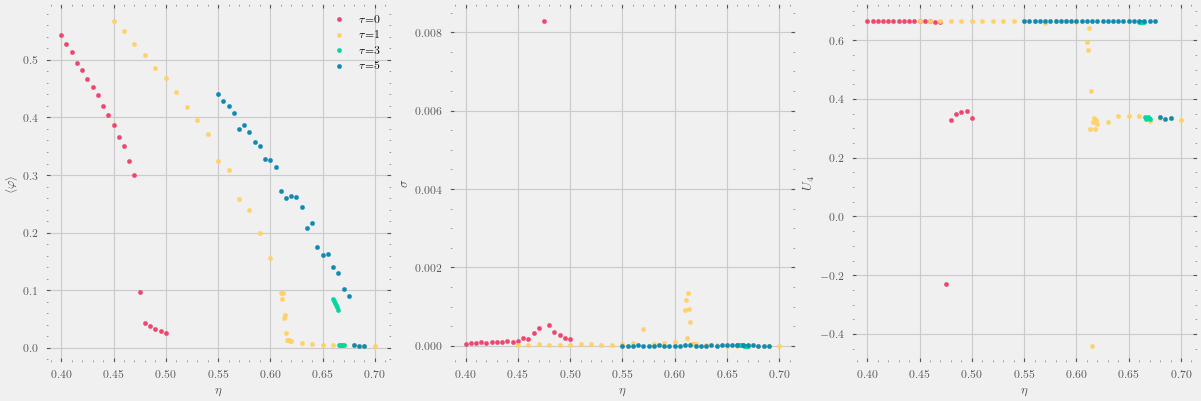

In [42]:

# for i in range(1,7,1):

i=6
path = "../data/observables/combinedData/"
#-------Import Data-------
orderParameterData = sorted(glob.glob(path+"*.txt"))

fig, (ax1, ax2, ax3)= plt.subplots(1,3, figsize=(12, 4))
noiseSeries = []
polarOrderSeries = []
polarOrder2Series = []
polarOrder4Series = []

for d in range(np.size(orderParameterData)):
    noise, polarOrder, polarOrder2, polarOrder4 = np.loadtxt(orderParameterData[d], unpack=True, skiprows=0)

    noiseSeries.append(noise)
    polarOrderSeries.append(polarOrder)
    polarOrder2Series.append(polarOrder2)
    polarOrder4Series.append(polarOrder4)

    variance = (polarOrder2 - polarOrder*polarOrder)
    binder = 1- polarOrder4/(3*polarOrder2*polarOrder2)
    fileName = str(orderParameterData[d])
    # ax1.scatter(noise, [polarOrder], s=5, label=r"$\tau$="+fileName[45])
    # ax2.scatter(noise, variance)
    # ax3.scatter(noise, binder)

    ax1.scatter(noise, polarOrder, color = colours[d], label=r"$\tau$="+fileName[39], s=10)
    ax2.scatter(noise, variance, color = colours[d], label=r"$\tau$="+fileName[39], s=10)
    ax3.scatter(noise, binder, color = colours[d], label=r"$\tau$="+fileName[39], s=10)


    # ax1.text(0.15,0,"a)",fontsize=18)
    # ax2.text(0.15,1,"b)",fontsize=18)
    # ax3.text(0.15,0.3,"c)",fontsize=18)
    ax1.grid(which="both")
    ax1.set_xlabel(r"$\eta$")
    ax1.set_ylabel(r'$\langle\varphi\rangle$')
    ax1.legend()

    ax2.set_xlabel(r"$\eta$")
    ax2.set_ylabel(r'$\sigma$')
    ax3.set_xlabel(r"$\eta$")
    ax3.set_ylabel(r'$U_4$')

plt.savefig('../savedImages/threeFramesOrderVarianceBinder.eps', format='eps')
